First we read the csv files

In [17]:
import pandas as pd


drugCombinationPath = "drug_combinations.csv"
cellDataPath = "cell_protein.csv"

drugComboCsv = pd.read_csv(drugCombinationPath)
cellCsv = pd.read_csv(cellDataPath)



In [18]:
drugComboCsv["cell"] = drugComboCsv["cell"].astype(str).str.strip()
cellCsv["cell"] = cellCsv["cell"].astype(str).str.strip()

In [19]:
merged_df = pd.merge(drugComboCsv, cellCsv, on = "cell", how="inner")
merged_df = merged_df[merged_df["synergy"] > 20.0]

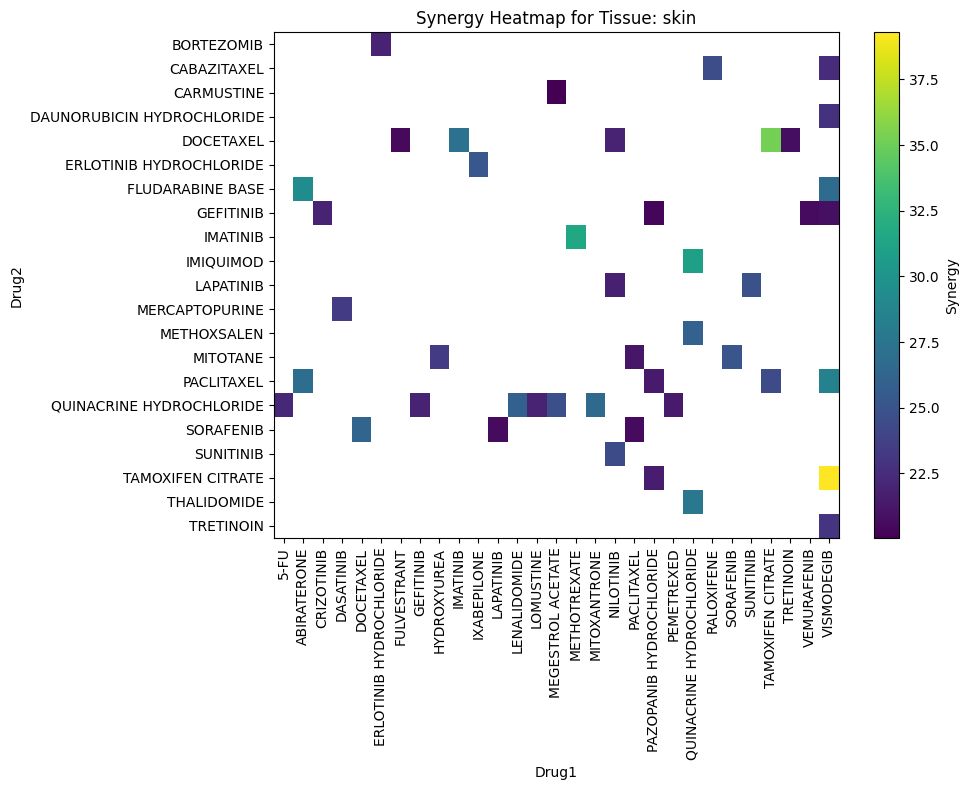

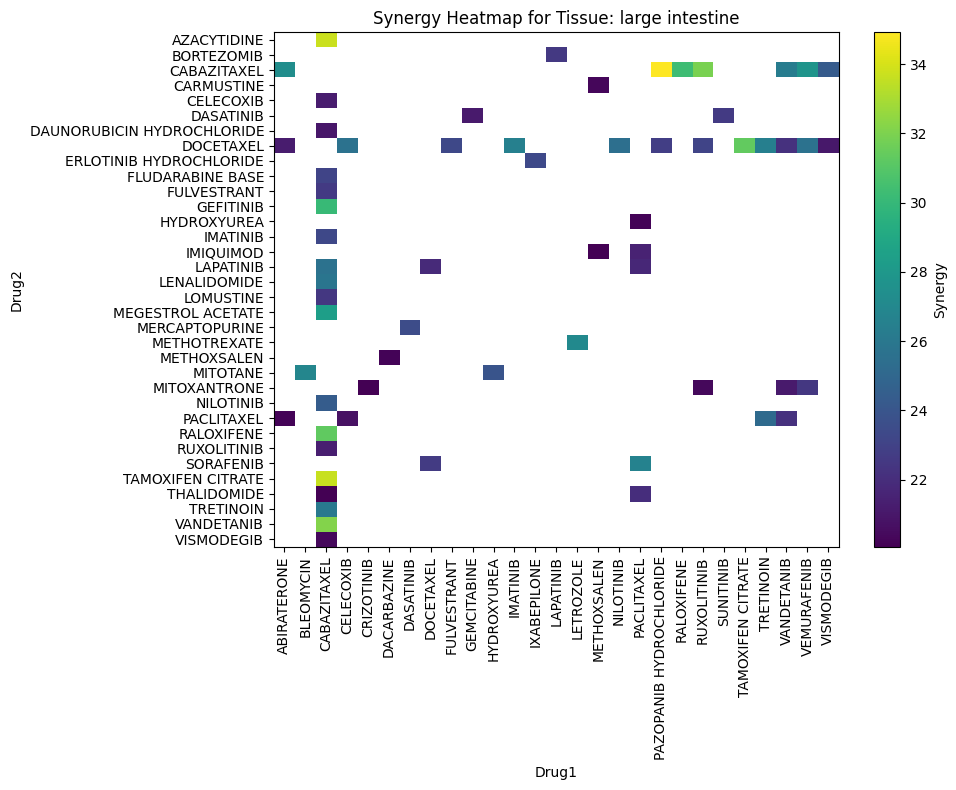

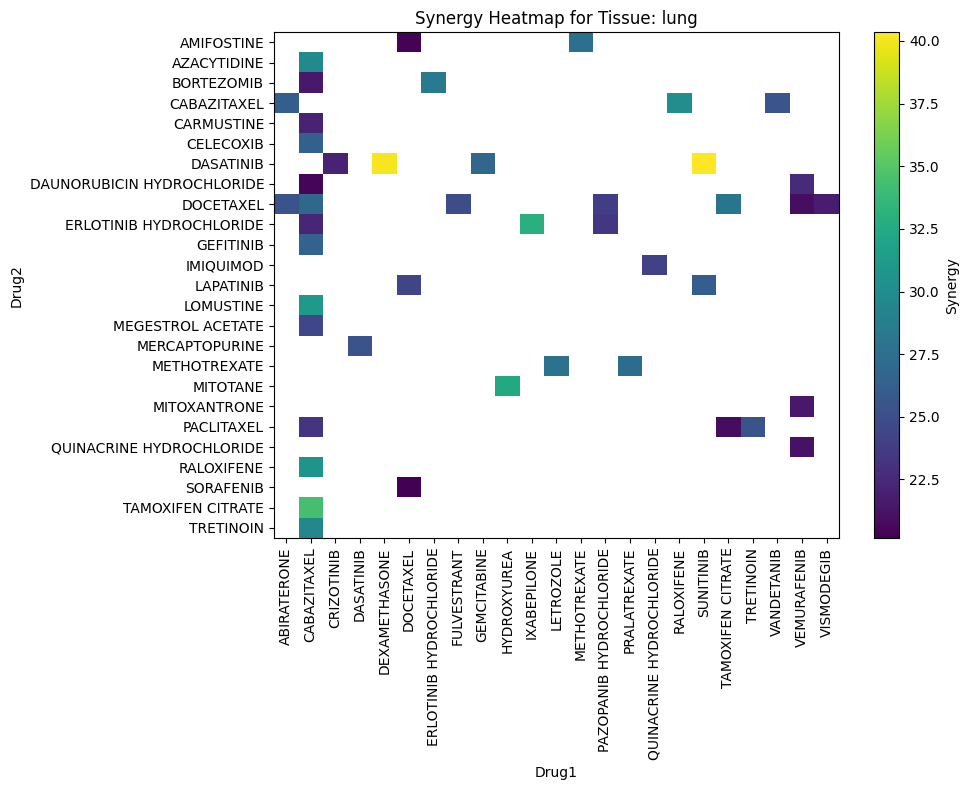

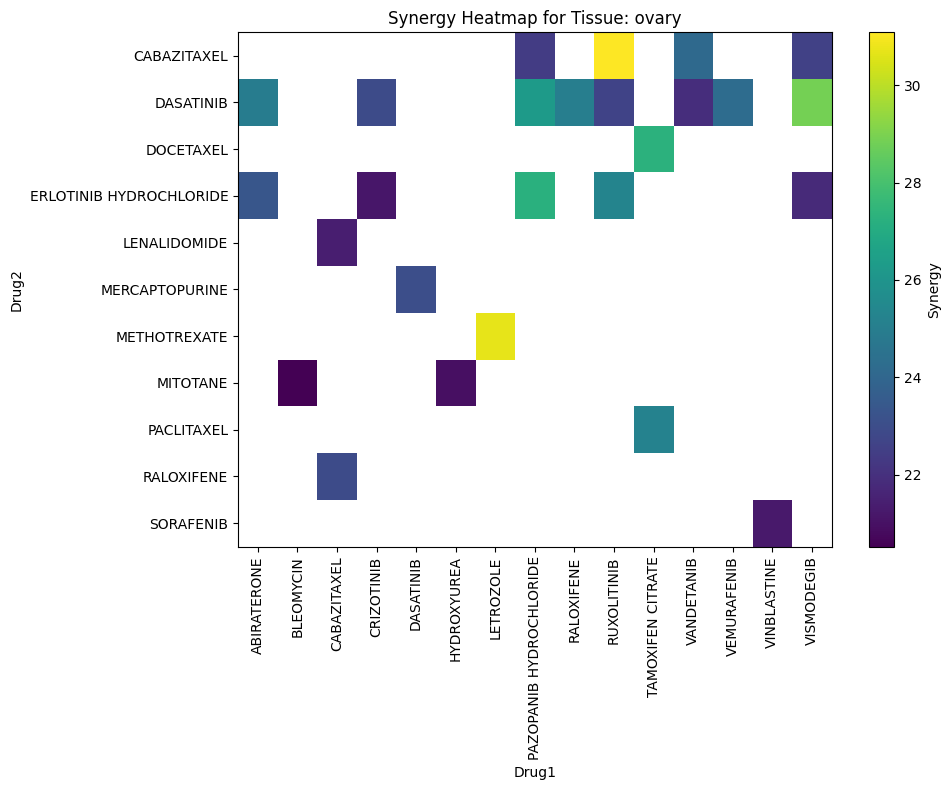

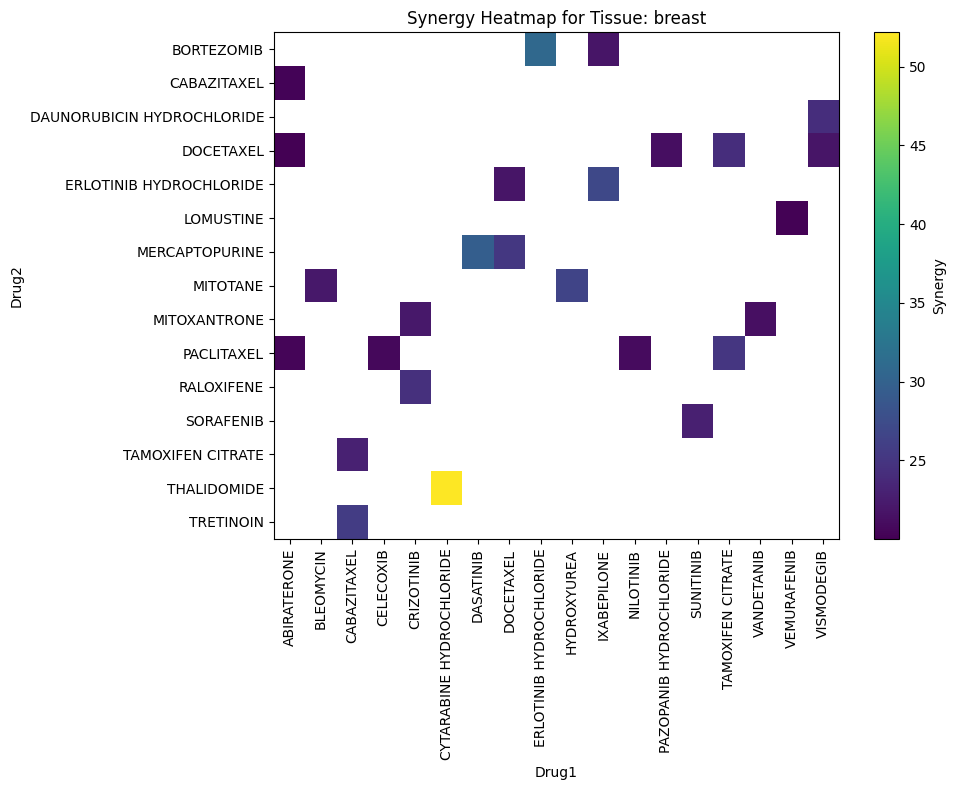

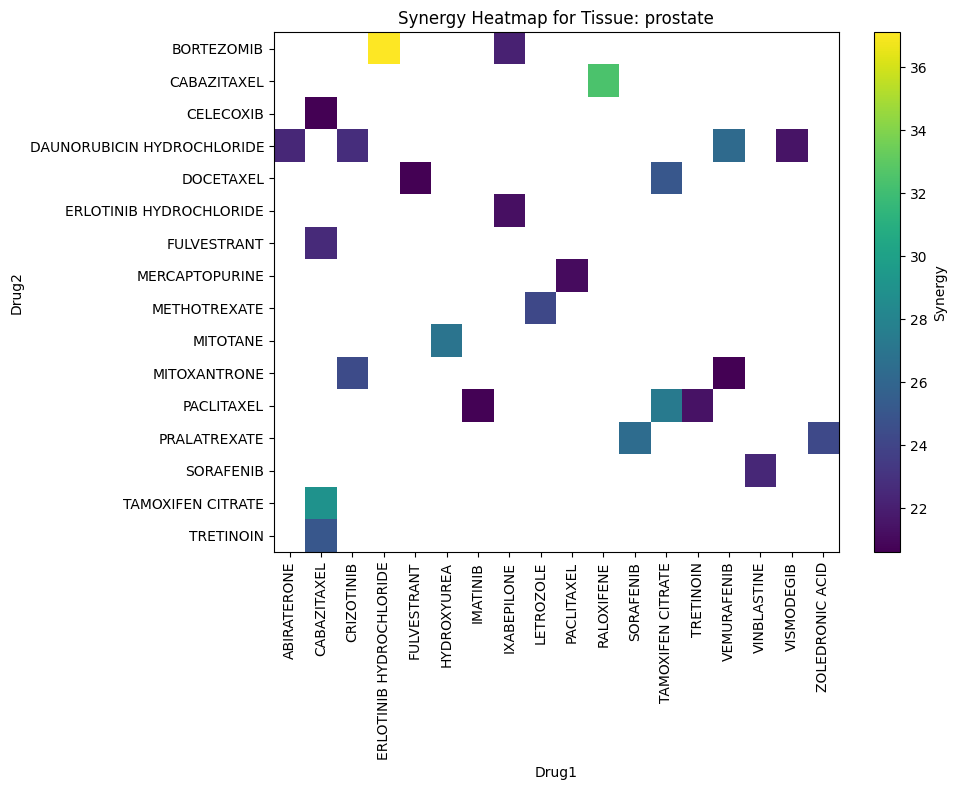

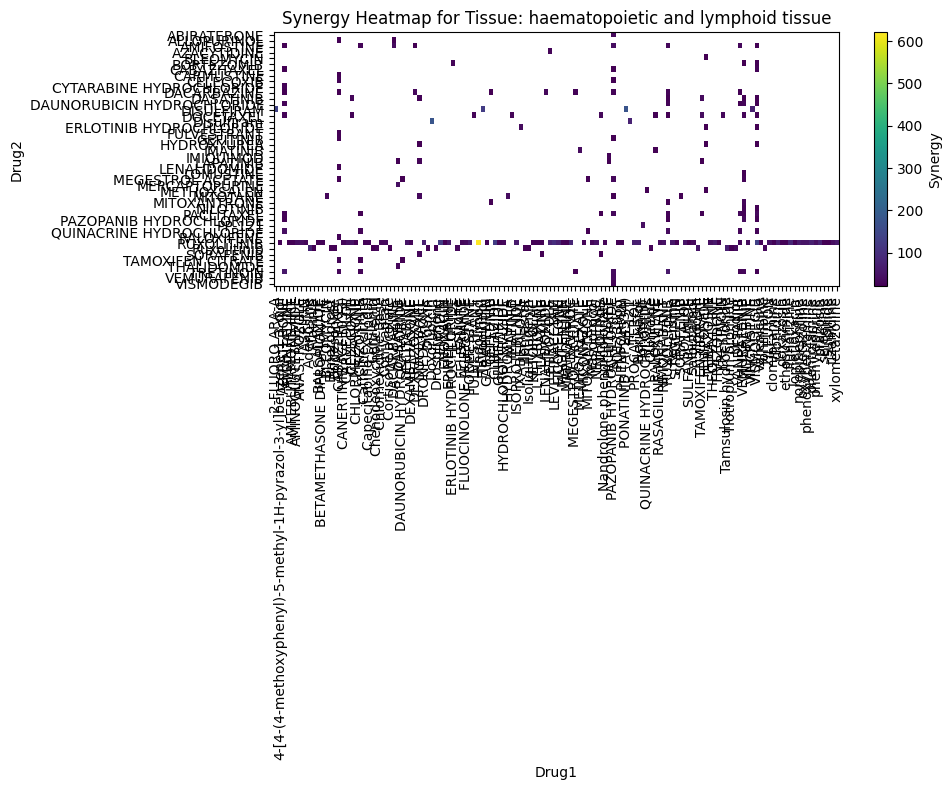

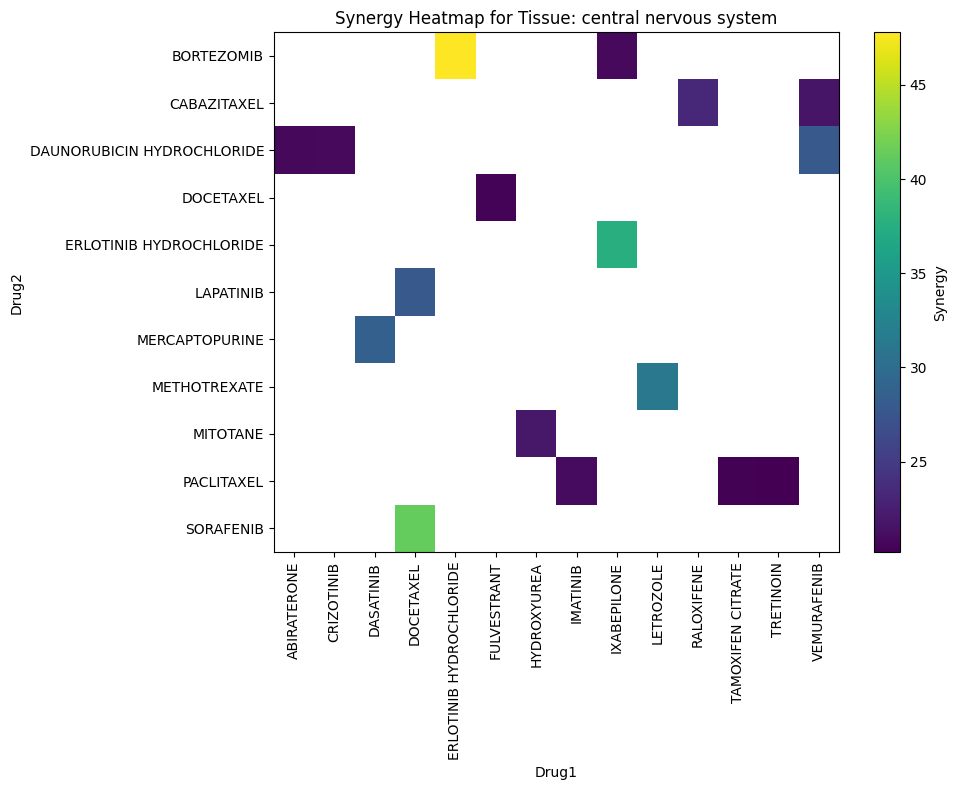

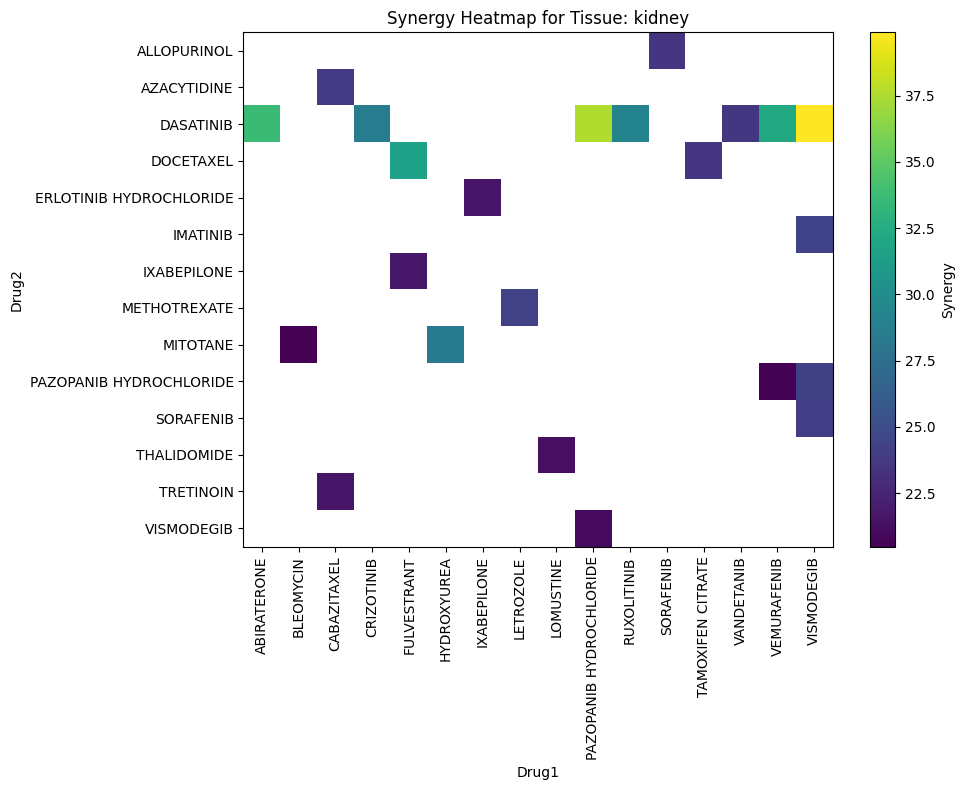

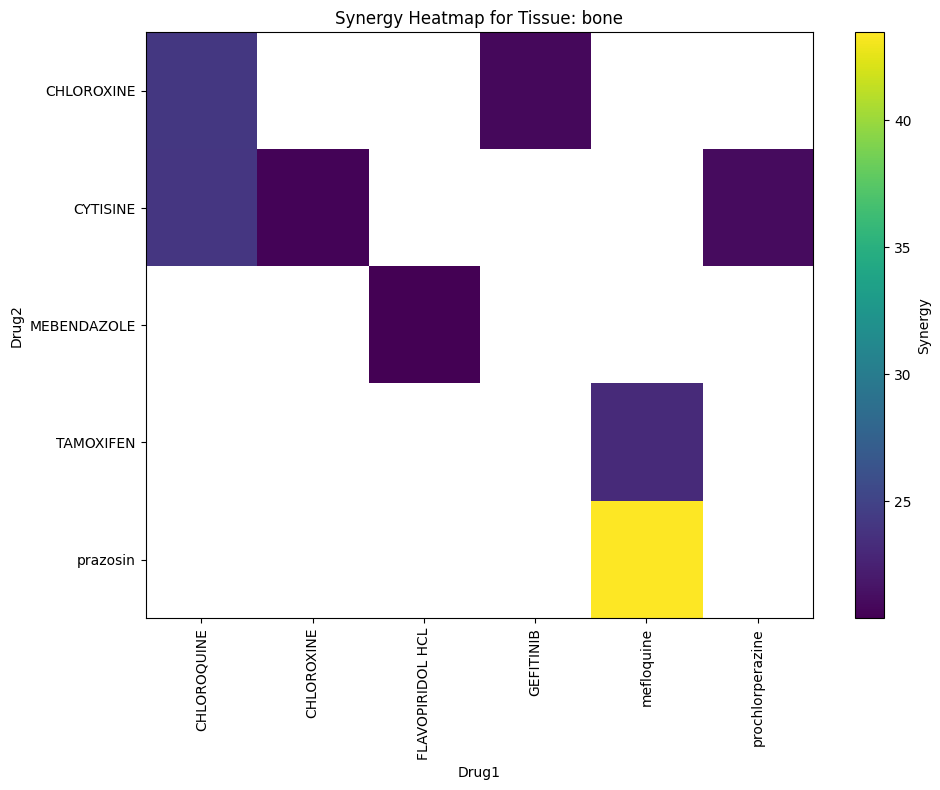

In [20]:
import matplotlib.pyplot as plt
import numpy as np

# Ensure no duplicate rows in the base DataFrame
merged_df = merged_df[["Drug1", "Drug2", "synergy", "Tissue"]].drop_duplicates()

# Get unique tissue types
tissue_types = merged_df["Tissue"].unique()

# Loop over each tissue type to create a heatmap
for tissue in tissue_types:
    # Filter for the current tissue type
    df = merged_df[merged_df["Tissue"] == tissue]

    # Aggregate any duplicate Drug1-Drug2 pairs by averaging synergy values
    df = df.groupby(["Drug1", "Drug2"], as_index=False).agg({"synergy": "mean"})

    # Pivot the data so Drug1 and Drug2 form the grid, with synergy as values
    heatmap_data = df.pivot(index="Drug2", columns="Drug1", values="synergy")

    # Plot the heatmap
    plt.figure(figsize=(10, 8))
    plt.imshow(heatmap_data, cmap="viridis", aspect="auto")
    plt.colorbar(label="Synergy")

    # Set axis labels and title
    plt.xlabel("Drug1")
    plt.ylabel("Drug2")
    plt.title(f"Synergy Heatmap for Tissue: {tissue}")

    # Set x and y ticks with drug names
    plt.xticks(ticks=np.arange(len(heatmap_data.columns)), labels=heatmap_data.columns, rotation=90)
    plt.yticks(ticks=np.arange(len(heatmap_data.index)), labels=heatmap_data.index)

    plt.tight_layout()
    plt.show()